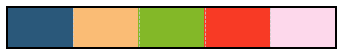

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import seaborn as sns
import re
import os
import json
import re
import jsonpickle
import sys
import graphviz
import glob
from statistics import mean, stdev, median
sys.path.append(r'..')

output_dir = os.path.join(os.path.expanduser("~"), "repos/ei-paper/figs")
# data_dir = os.path.join(os.path.expanduser("~"), "repos/cloudlab/results-JQF/merged")
# EI data
# data_dir = os.path.join(os.path.expanduser("~"), "/usr0/home/aoli/repos/cloudlab/results-JQF/ei-48h-12-12/")
%load_ext autoreload
%autoreload 2
import sns_configs
from process_data import identify_algorithms

# Mix Data


Identified algorithms:  {'mix-testWithGenerator'}
{'mix-testWithGenerator'}
[0, 0, 0, 0, 0, 0]
Cov-All
Cov-Avg
\begin{array}{l | r | l | l | l} \hline
    \verb|Dataset| & \verb| ?  | & \verb|Improvement| & \verb|\sigma| & \verb|p| \\ \hline
    \hline
    ant     & 5658 &             &        &   \\ \hline
    maven   & 4135 &             &        &   \\ \hline
    bcel    & 5009 &             &        &   \\ \hline
    rhino   &    0 &             &        &   \\ \hline
    closure &    0 &             &        &   \\ \hline
    chocopy & 1818 &             &        &   \\ \hline
    gson    &  690 &             &        &   \\ \hline
    jackson & 2307 &             &        &   \\ \hline
\end{array}


KeyError: 0

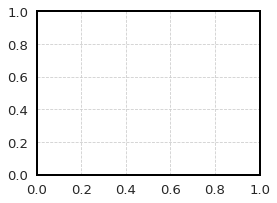

In [5]:
data_dirs = [
    # os.path.join(os.path.expanduser("~"),
    #              "/usr0/home/aoli/repos/cloudlab/results-JQF/ei-48h-12-19/"),
    # os.path.join(os.path.expanduser("~"),
    #              "/usr0/home/aoli/repos/cloudlab/results-JQF/ei-48h-12-12/"),
    # os.path.join(os.path.expanduser("~"),
    #              "/usr0/home/aoli/repos/cloudlab/results-JQF/ei-48h-12-21/"),
    #  os.path.join(os.path.expanduser("~"), "/usr0/home/aoli/repos/cloudlab/results-JQF/ei-24h-04-26"),
    # os.path.join(os.path.expanduser("~"), "/usr0/home/aoli/repos/cloudlab/results-JQF/js-gen-long")
    # os.path.join(os.path.expanduser("~"), "/usr0/home/aoli/repos/cloudlab/results-JQF/merged")
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei")
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-no-steal")
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430")
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430")
    os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-d430-mix")
    # os.path.join(os.path.expanduser("~"), "/data/aoli/results-JQF/ei-more-havoc")
]
output_dir = os.path.join(os.path.expanduser("~"), data_dirs[0], "fig")
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

algorithms = identify_algorithms(data_dirs)
print("Identified algorithms: ", algorithms)

from process_data import generate_cov_table, visualize_cov_distribution

print(algorithms)
result = generate_cov_table(data_dirs, sorted(algorithms), output_dir)
visualize_cov_distribution(output_dir, result)


In [8]:
process_data import generate_graph

generate_graph(data_dirs, algorithms, output_dir)

ant-ei-no-havoc-0 ERROR!
ant-ei-no-havoc-1 ERROR!
ant-ei-no-havoc-2 ERROR!
ant-ei-no-havoc-3 ERROR!
ant-ei-no-havoc-4 ERROR!
ant-zest-fast-0 ERROR!
ant-zest-fast-1 ERROR!
ant-zest-fast-2 ERROR!
ant-zest-fast-3 ERROR!
ant-zest-fast-4 ERROR!
# unix_time total_inputs
ant
# unix_time all_covered_probes
maven-ei-no-havoc-0 ERROR!
maven-ei-no-havoc-1 ERROR!
maven-ei-no-havoc-2 ERROR!
maven-ei-no-havoc-3 ERROR!
maven-ei-no-havoc-4 ERROR!
maven-zest-fast-0 ERROR!
maven-zest-fast-1 ERROR!
maven-zest-fast-2 ERROR!
maven-zest-fast-3 ERROR!
maven-zest-fast-4 ERROR!
# unix_time total_inputs
maven
# unix_time all_covered_probes
bcel-ei-no-havoc-0 ERROR!
bcel-ei-no-havoc-1 ERROR!
bcel-ei-no-havoc-2 ERROR!
bcel-ei-no-havoc-3 ERROR!
bcel-ei-no-havoc-4 ERROR!
bcel-zest-fast-0 ERROR!
bcel-zest-fast-1 ERROR!
bcel-zest-fast-2 ERROR!
bcel-zest-fast-3 ERROR!
bcel-zest-fast-4 ERROR!
# unix_time total_inputs
bcel
# unix_time all_covered_probes
rhino-ei-no-havoc-0 ERROR!
rhino-ei-no-havoc-1 ERROR!
rhino-ei-no-h

<Figure size 288x216 with 0 Axes>

In [41]:
from process_data import generate_corpus_exec_time, generate_perf_graph

generate_perf_graph(data_dirs, algorithms, output_dir, "exec_time")

<Figure size 288x216 with 0 Axes>

In [5]:

from process_data import generate_corpus_exec_time, generate_perf_graph


data_dir = os.path.join(os.path.expanduser("~"), "repos/cloudlab/results-JQF/ei-48h-11-22-p")
generate_perf_graph(data_dir, algorithms, output_dir, "perf")

<Figure size 432x216 with 0 Axes>